# Use result helpers to load custom data {#ref_use_result_helpers}

The `Result <ansys.dpf.core.results.Result>`{.interpreted-text
role="class"} class, which is an instance created by the
`Model <ansys.dpf.core.model.Model>`{.interpreted-text role="class"},
gives access to helpers for requesting results on specific mesh and time
scopings. With these helpers, working on a custom spatial and temporal
subset of the model is straightforward.


In [1]:
# Import necessary modules
from ansys.dpf import core as dpf
from ansys.dpf.core import examples

Create a model object to establish a connection with an example result
file:


In [2]:
model = dpf.Model(examples.download_multi_stage_cyclic_result())
print(model)

DPF Model
------------------------------
Modal analysis
Unit system: MKS: m, kg, N, s, V, A, degC
Physics Type: Mechanical
Available results:
     -  displacement: Nodal Displacement
     -  stress: ElementalNodal Stress 
     -  elastic_strain: ElementalNodal Strain
     -  structural_temperature: ElementalNodal Temperature
------------------------------
DPF  Meshed Region: 
  3595 nodes 
  1557 elements 
  Unit: m 
  With solid (3D) elements
------------------------------
DPF  Time/Freq Support: 
  Number of sets: 6 
Cumulative     Frequency (Hz) LoadStep       Substep        Harmonic index  
1              188.385357     1              1              0.000000        
2              325.126418     1              2              0.000000        
3              595.320548     1              3              0.000000        
4              638.189511     1              4              0.000000        
5              775.669703     1              5              0.000000        
6            

# Visualize specific mode shapes

Choose the modes to visualize:


In [3]:
modes = [1, 5, 6]

disp = model.results.displacement.on_time_scoping(modes)

# Choose a spatial subset

Work on only a named selection (or component).


Print the available named selection:


In [4]:
print(model.metadata.available_named_selections)

['BC', 'ELM', 'STAG1', 'STAG1HIGH', 'STAG1LOW', 'STAG2', 'STAG2HIGH', 'STAG2LOW', '_BC_NOD', '_FIXEDSU', '_INTF_ELM', '_INTF_NOD', '_NOD', '_STAG1_BASE_ELM', '_STAG1_BASE_NOD', '_STAG1_CYCHIGH_NOD', '_STAG1_CYCLOW_NOD', '_STAG2_BASE_ELM', '_STAG2_BASE_NOD', '_STAG2_CYCHIGH_NOD', '_STAG2_CYCLOW_NOD']


Specify to the result that you want to work on a specific named
selection:


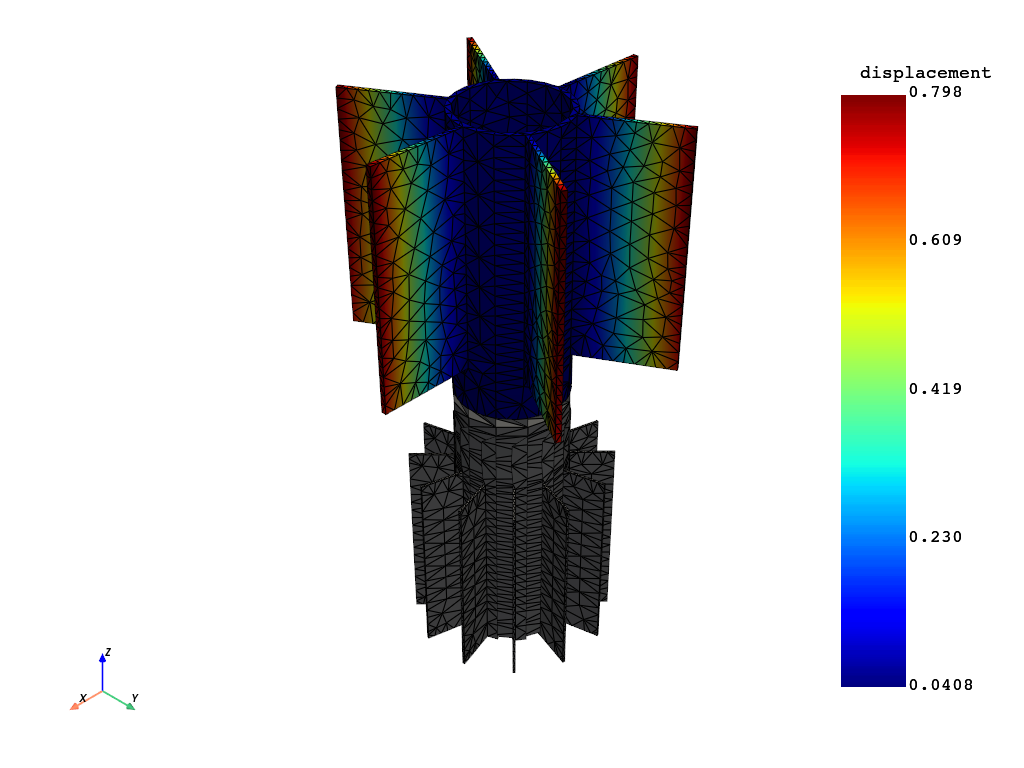

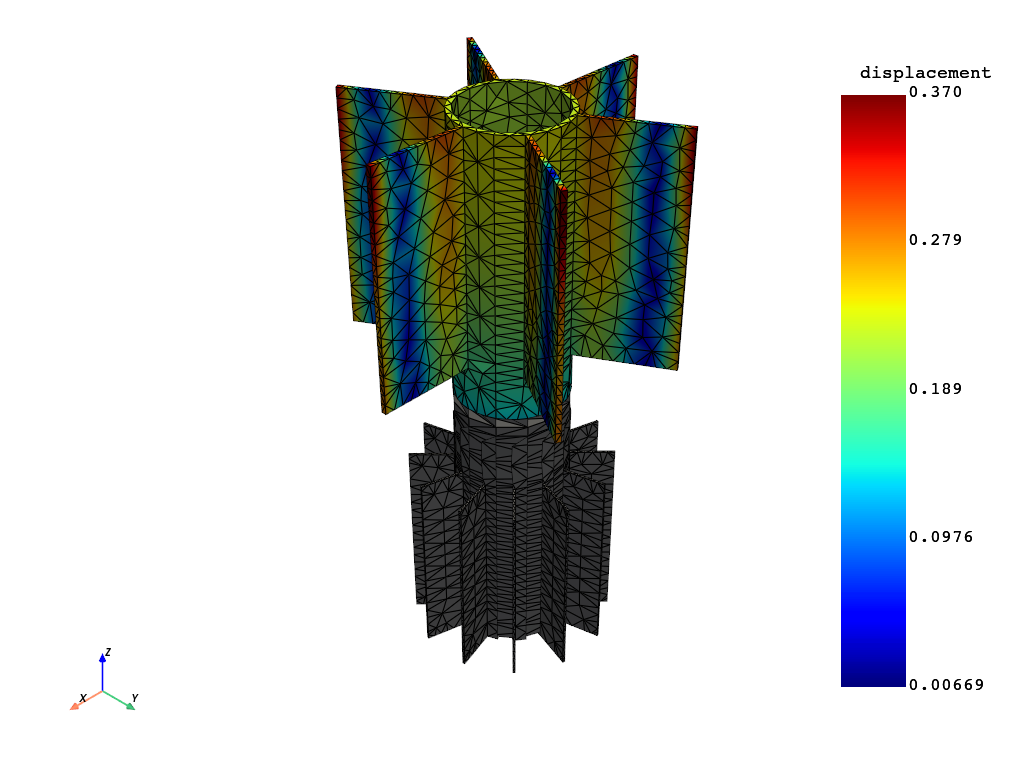

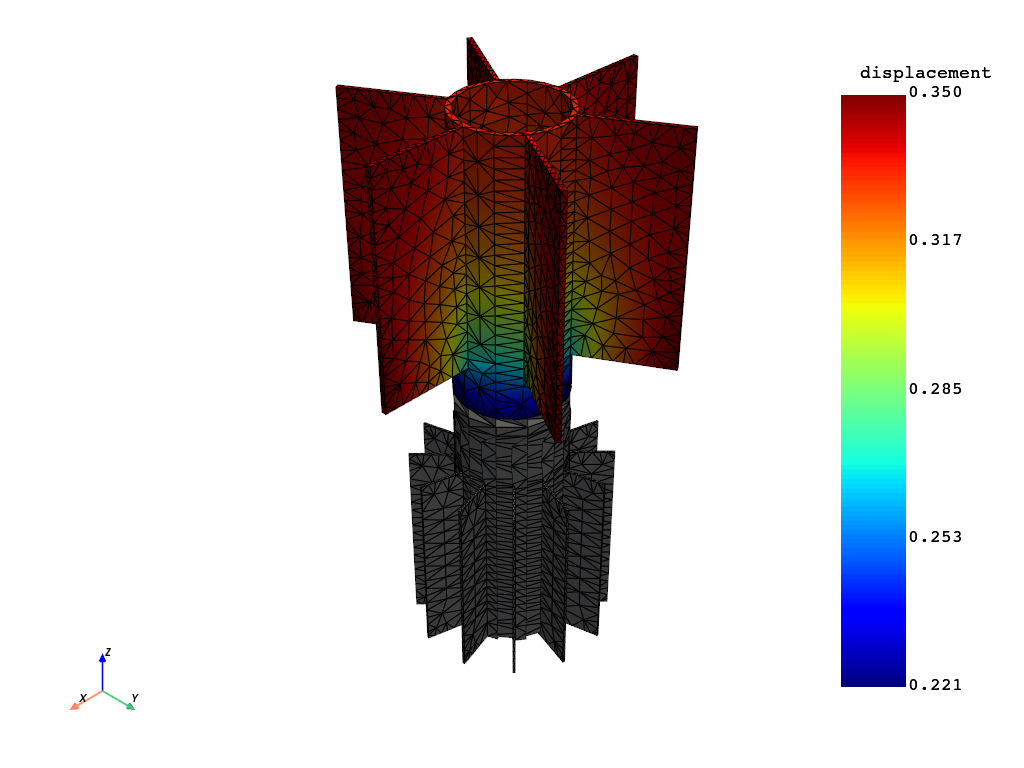

In [5]:
disp.on_named_selection("_STAG1_BASE_NOD")
op = disp()
op.inputs.read_cyclic(2)  # expand cyclic
results = op.outputs.fields_container()

# plot
for mode in modes:
    results[0].meshed_region.plot(results.get_fields_by_time_complex_ids(mode, 0)[0])

Specify to the result that you want to work on specific nodes:


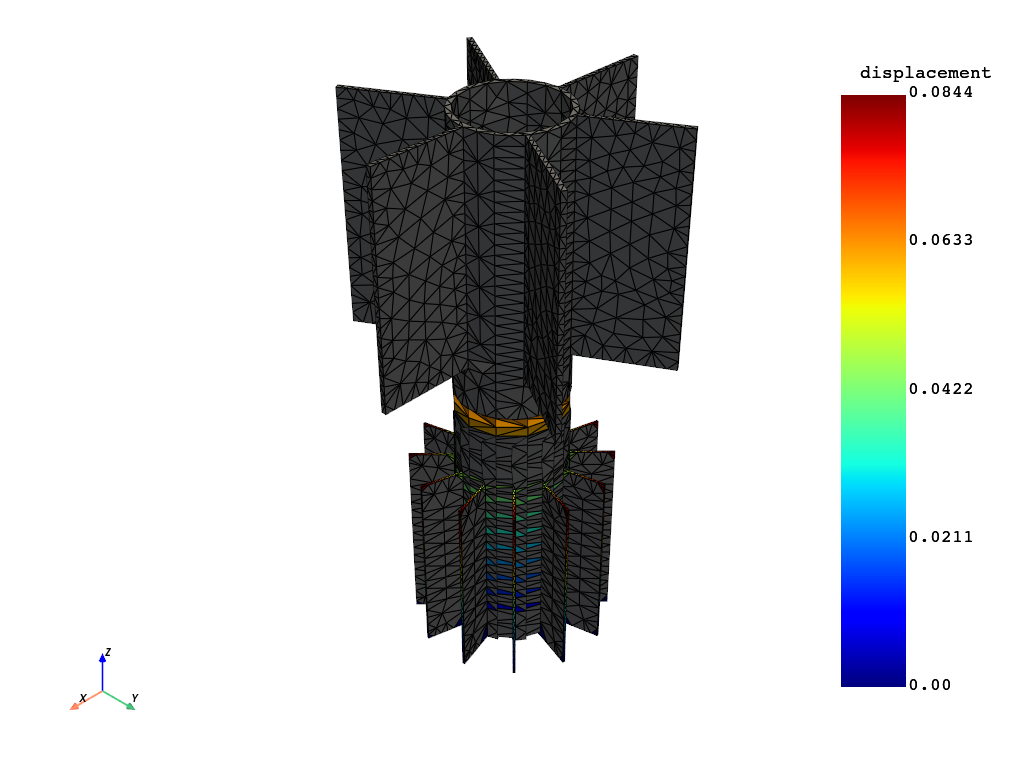

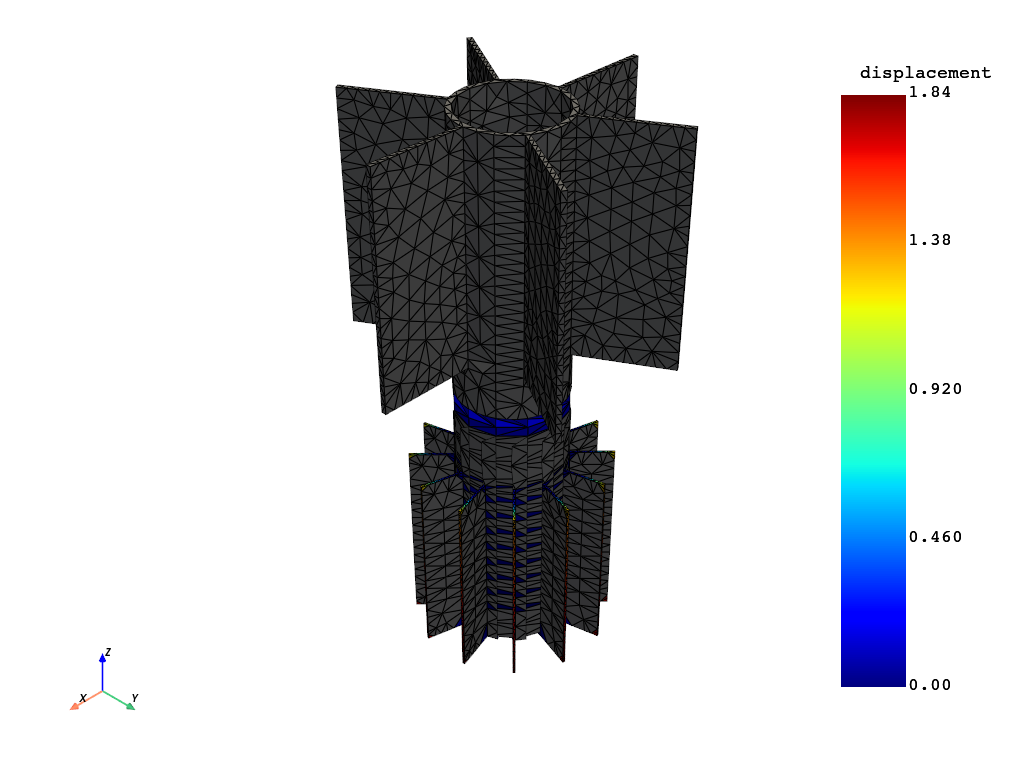

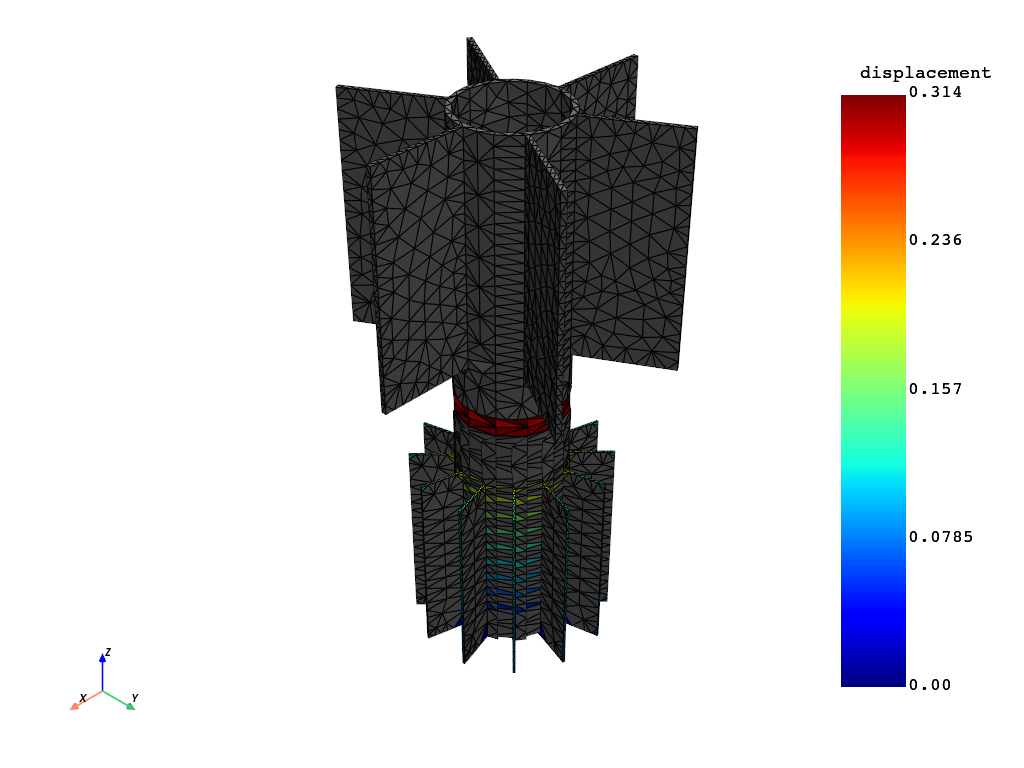

In [6]:
disp = model.results.displacement.on_time_scoping(modes)
disp.on_mesh_scoping(list(range(1, 200)))
op = disp()
op.inputs.read_cyclic(2)  # expand cyclic
results = op.outputs.fields_container()

# plot
for mode in modes:
    results[0].meshed_region.plot(results.get_fields_by_time_complex_ids(mode, 0)[0])